# Sentiment Analysis with [Tweepy](https://www.tweepy.org/) 

Import the credentials, essentials, tweepy and textblob

In [101]:
import credentials
import numpy as np
import tweepy as tw
import pandas as pd
import re
import string

from textblob import TextBlob

Import the visualization tools and word cloud related libraries 

In [118]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns

from PIL import Image
from wordcloud import WordCloud
from wordcloud import ImageColorGenerator

sns.set_style('whitegrid')

Set the authentication key for accessing Twitter data

In [3]:
auth = tw.OAuthHandler(credentials.CONSUMER_KEY, credentials.CONSUMER_KEY_SECRET)
auth.set_access_token(credentials.ACCESS_TOKEN, credentials.ACCESS_TOKEN_SECRET)

api = tw.API(auth, wait_on_rate_limit = True)

Define the related topic to search (from the #) and post start from certain date

In [4]:
hash_tag = "#PokemonSwordShield"
search_words = hash_tag + '-filter:retweets'

date_since = "2019-11-15"

Limiting the fetching process up to 200 and select the related information that kind of necessary (total number of retweet, devices and etc.)

In [100]:
tweets = tw.Cursor(api.search,q = search_words, lang = "en", since = date_since).items(200)

info =[[tweet.id, tweet.user.screen_name, tweet.text, tweet.favorite_count, tweet.retweet_count, tweet.source, tweet.created_at] for tweet in tweets]

Transform the information fetch from Twitter into a dataframe called <i>tweet_df</i>

In [6]:
tweet_df = pd.DataFrame(data = info, columns = ['ID', 'Username', 'Text', 'Favorite', 'Retweet', 'Source', 'Date'])

Glimpse of the dataframe

In [7]:
tweet_df.head()

,ID,Username,Text,Favorite,Retweet,Source,Date
0,1201755330561986560,MegaGallade2001,Another 300IQ play XD #PokemonSwordShield #Nin...,0,0,Nintendo Switch Share,2019-12-03 06:49:32
1,1201755168557027329,Kuroneko_6816,wow he just spit pikachu at me #PokemonSwordSh...,0,0,Nintendo Switch Share,2019-12-03 06:48:54
2,1201755147858149377,tikalso,I got a wild @hime_bell and @theartsypoe! #Pok...,0,0,Nintendo Switch Share,2019-12-03 06:48:49
3,1201755147216379905,stophkun,The hunt is over.\n#PokemonSwordShield #Ninten...,0,0,Nintendo Switch Share,2019-12-03 06:48:49
4,1201755125871595523,shubshub11,Boom #PokemonSwordShield #NintendoSwitch https...,0,0,Nintendo Switch Share,2019-12-03 06:48:44


 Data type for each columns

In [8]:
tweet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 7 columns):
ID          200 non-null int64
Username    200 non-null object
Text        200 non-null object
Favorite    200 non-null int64
Retweet     200 non-null int64
Source      200 non-null object
Date        200 non-null datetime64[ns]
dtypes: datetime64[ns](1), int64(3), object(3)
memory usage: 11.1+ KB


Summary of the dataframe

In [9]:
tweet_df.describe()

,ID,Favorite,Retweet
count,2.000000e+02,200.000000,200.000000
mean,1.201750e+18,0.990000,0.110000
std,2.925984e+12,1.977232,0.385543
min,1.201745e+18,0.000000,0.000000
25%,1.201747e+18,0.000000,0.000000
50%,1.201750e+18,0.000000,0.000000
75%,1.201752e+18,1.000000,0.000000
max,1.201755e+18,19.000000,2.000000


Create a new column called *text_length* that contain total length of the text

In [10]:
tweet_df['text_length'] = tweet_df['Text'].apply(len)

Plot the data to find out if any relationship exist between the text_length and number of retweet

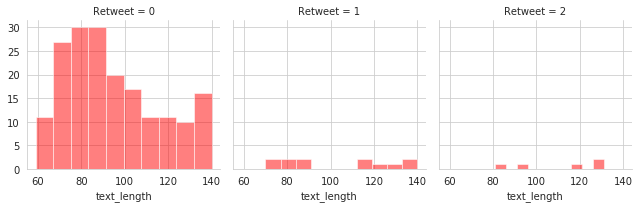

In [12]:
g = sns.FacetGrid(tweet_df, col = 'Retweet')
g.map(plt.hist, 'text_length', color = 'r', alpha = 0.5)

Plot the data to find out if any relationship exist between the text_length and number of favorite

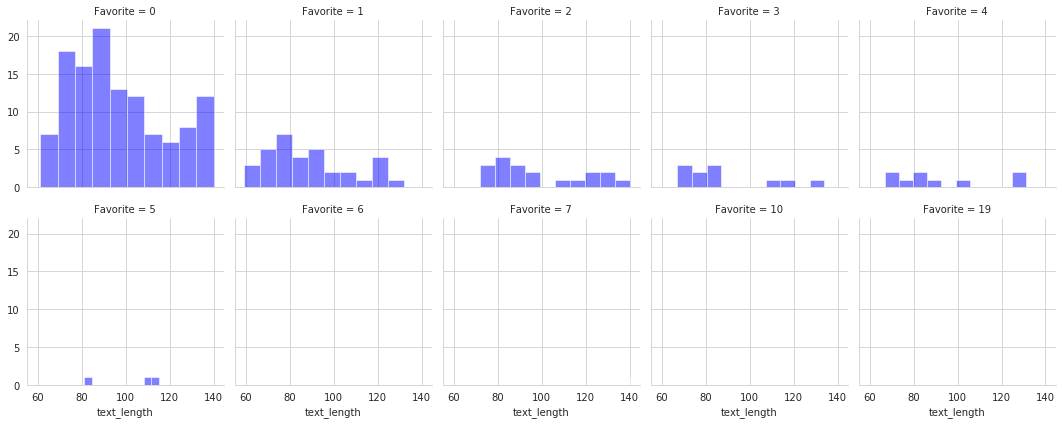

In [102]:
g = sns.FacetGrid(tweet_df, col = 'Favorite', col_wrap = 5)
g.map(plt.hist, 'text_length', color = 'b', alpha = 0.5)

Using box plot to find the relation ship between text length and retweet

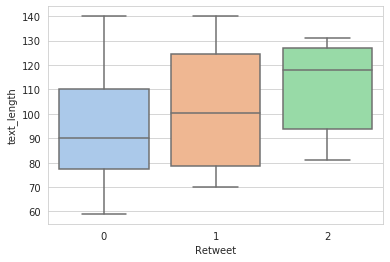

In [14]:
sns.boxplot(x = 'Retweet', y = 'text_length', data = tweet_df, palette = 'pastel')

Using box plot to find the relation ship between text length and favorite

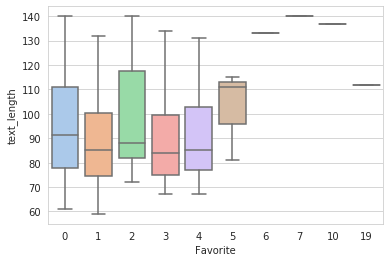

In [15]:
sns.boxplot(x = 'Favorite', y = 'text_length', data = tweet_df, palette = 'pastel')

Find the correlation between the number of retweet and number of favorite

In [94]:
fav_retweet = tweet_df.groupby(['Retweet', 'Favorite']).count()['Text'].unstack()

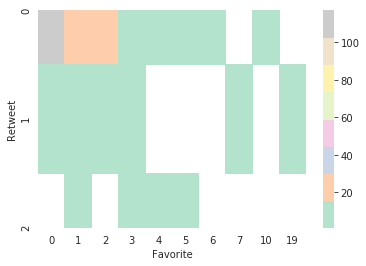

In [99]:
sns.heatmap(fav_retweet, cmap = 'Pastel2')

Based on the graph, we can conclude here, that the length of the text doesn't determine the number of retweet and favorite 

Find the most used devices that use to tweet, retweet or favorite a tweet regarding *Pokemon Sword and Shield*

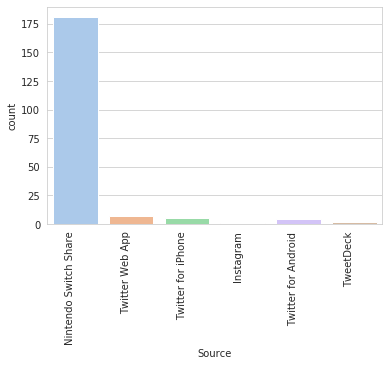

In [17]:
f = sns.countplot(x = 'Source', data = tweet_df, palette = 'pastel')
f.set_xticklabels(f.get_xticklabels(), rotation = 90, ha = 'right')
f

It make sense, Nintendo Switch is the most used device  as it was the platform for *Pokemon Sword and Shield* 

Define a function that clean out the special characters 

In [73]:
def clean(text):
        return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", text).split())

Define a function to return a certain number if the sentinment analysis meet the requirement

In [74]:
def analyze_sentiment(text):
    analysis = TextBlob(text)
        
    if analysis.sentiment.polarity > 0:
        return 1
    elif analysis.sentiment.polarity == 0:
        return 0
    else:
        return -1

Applying the clean function on *Text* column 

In [77]:
tokenize = tweet_df['Text'].apply(clean)

Applying the analyze_sentiment function on cleaned *Text* column

In [80]:
tweet_df['sentiment'] = tokenize.apply(analyze_sentiment)

Check the sentiment result

In [107]:
tweet_df[['Text', 'sentiment']].head(10)

,Text,sentiment
0,Another 300IQ play XD #PokemonSwordShield #Nin...,0
1,wow he just spit pikachu at me #PokemonSwordSh...,1
2,I got a wild @hime_bell and @theartsypoe! #Pok...,1
3,The hunt is over.\n#PokemonSwordShield #Ninten...,0
4,Boom #PokemonSwordShield #NintendoSwitch https...,0
5,"shhh,,,,, she is resting #PokemonSwordShield #...",0
6,"HE SAID "":3"" #PokemonSwordShield #NintendoSwit...",0
7,OMFG AAAAAAAAAAAAAAAAAAAAAAAA #宝可梦剑盾 #Nintendo...,0
8,Someones salty after a 300 IQ play XD #Pokemon...,0
9,Got her! Random Purrloin is Shiny Number 2! #P...,-1


In [114]:
tweet_df['Text'].iloc[1:3]

1    wow he just spit pikachu at me #PokemonSwordSh...
2    I got a wild @hime_bell and @theartsypoe! #Pok...
Name: Text, dtype: object

In [109]:
tweet_df['Text'].iloc[9]

'Got her! Random Purrloin is Shiny Number 2! #PokemonSwordShield #NintendoSwitch https://t.co/fZF5mJx31T'

As we can see on the table above, row number 1 and 2 got a positive sentiment while row number 9 got a negative sentiment value. On row number 9 it doesn't make any sense for the analyzer label it as a negative value sentiment.

Making a word tag using *WordCloud* and mask the *Pokemon Sword and Shield* logo

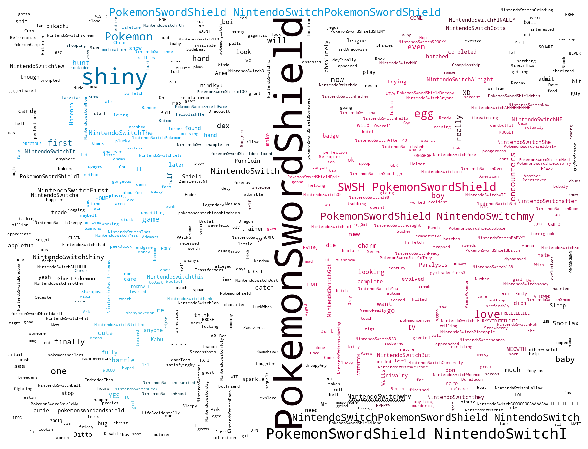

In [84]:
text = ''.join(tokenize)

mask = np.array(Image.open('image/logo.png'))

image_colors = ImageColorGenerator(mask)

wordcloud = WordCloud(background_color = 'white', mask = mask, max_words = 1000, width = 1600, height = 800).generate(text)

plt.figure(figsize = (16, 8))
plt.imshow(wordcloud.recolor(color_func = image_colors))
plt.axis('off')
plt.show()

Image reference. Credit to  [DecaTilde](https://www.deviantart.com/decatilde/art/Pokemon-Sword-and-Shield-symbols-recreation-787518293) for the awesome image

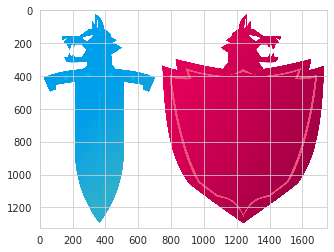

In [119]:
img = mpimg.imread('image/logo.png')
imgplot = plt.imshow(img)
plt.show()